# Application Programming Interface

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

-   Create and Use APIs in Python


### Introduction

An API lets two pieces of software talk to each other. Just like a function,  you don’t have to know how the API works only its inputs and outputs.  An essential type of API is a REST API that allows you to access resources via the internet. In this lab, we will review the Pandas Library  in the context of an API, we will also review a basic REST API  


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Pandas is an API</a></li>
<li><a href="#ref1">REST APIs Basics  </a></li>
<li><a href="#ref2">Quiz on Tuples</a></li>

</div>

<hr>


In [2]:
!pip install nba_api

     |████████████████████████████████| 242 kB 15.0 MB/s eta 0:00:01


In [3]:
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

<h2 id="PandasAPI">Pandas is an API </h2>


Pandas is actually set of software components , much of  which is not even written in Python.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
dict_={'a':[11,21,31],'b':[12,22,32]}

In [7]:
df = pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

In [8]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


In [9]:
df.mean()

a    21.0
b    22.0
dtype: float64

<h2 id="ref1">REST APIs</h2>


In [10]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt

<p>Rest API’s function by sending a <b>request</b>,  the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or <b>resource</b> to perform. In a similar manner, API returns a <b>response</b>, via an HTTP message, this response is usually contained within a JSON.</p>
<p>In this lab, we will use the <a href=https://pypi.org/project/nba-api/>NBA API</a> to determine how well the Golden State Warriors performed against the Toronto Raptors. We will use the API do the determined number of points the Golden State Warriors won or lost by for each game. So if the value is three, the Golden State Warriors won by three points. Similarly it the  Golden State Warriors lost  by two points the result will be negative two. The API is relatively will handle a lot of the details such a Endpoints and Authentication </p>


In the nba api to make a request for a specific team, it's quite simple, we don't require a JSON all we require is an id. This information is stored locally in the API we import the module teams 


In [11]:
#https://pypi.org/project/nba-api/

The method <code>get_teams()</code> returns a list of dictionaries  the dictionary key id has a unique identifier for each team as a value 


In [13]:
nba_teams = teams.get_teams()

The dictionary key id has a unique identifier for each team as a value, let's look at the first three elements of the list:


In [15]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

To make things easier, we can convert the dictionary to a table. First, we use the function <code>one dict</code>, to create a dictionary. We use the common keys for each team as the keys,  the value is a list; each element of the list corresponds to the values for each team.
We then convert the dictionary to a dataframe, each row contains the information for a different team.


In [30]:
dict_nba_team = one_dict(nba_teams)
df_teams = pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


Will use the team's nickname to find the unique id, we can see the row that contains the warriors by using the column nickname as follows:


In [31]:
df_warriors = df_teams[df_teams['nickname']=="Warriors"]
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


we can use the following line of code to access the first column of the dataframe:


In [32]:
id_warriors = df_warriors[['id']].values[0][0]
#we now have an integer that can be used   to request the Warriors information 
id_warriors

1610612744

The function "League Game Finder " will make an API call, its in the module <code>stats.endpoints</code> 


In [36]:
from nba_api.stats.endpoints import leaguegamefinder

The parameter <code>team_id_nullable</code> is the unique ID for the warriors. Under the hood, the NBA API is making a HTTP request.  
The information requested is provided and is transmitted via an HTTP response this is assigned to the object <code>gamefinder</code>.


In [37]:
# Since https://stats.nba.com does not allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is comment out, you can run it on jupyter labs on your own computer.
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

ReadTimeout: HTTPSConnectionPool(host='stats.nba.com', port=443): Read timed out. (read timeout=30)

we can see the json file by running the following line of code. 


In [ ]:
# Since https://stats.nba.com does not allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is comment out, you can run it on jupyter labs on your own computer.
gamefinder.get_json()

The game finder object has a method <code>get_data_frames()</code>, that returns a dataframe.  If we view the dataframe, we can see it contains information about all the games the Warriors played.  The <code>PLUS_MINUS</code> column contains information on the score, if the value is negative the Warriors lost by that many points, if the value is positive, the warriors one by that amount of points. The column <code>MATCHUP </code>had the team the Warriors were playing, GSW stands for Golden State Warriors and TOR means Toronto Raptors; <code>vs</code> signifies it was a home game and the <code>@ </code>symbol means an away game.


In [38]:
# Since https://stats.nba.com does not allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is comment out, you can run it on jupyter labs on your own computer.
# games = gamefinder.get_data_frames()[0]
# games.head()

you can download the dataframe from the API call for Golden State and run the rest like a video.


In [40]:
! wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl

--2020-11-22 22:23:54--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 811065 (792K) [application/octet-stream]
Saving to: ‘Golden_State.pkl’

Golden_State.pkl    100%[===================>] 792.06K  1.38MB/s    in 0.6s    

2020-11-22 22:23:55 (1.38 MB/s) - ‘Golden_State.pkl’ saved [811065/811065]



In [41]:
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


We can create two dataframes, one  for the games that the Warriors faced the raptors at home and the second for away games.


In [42]:
games_home=games [games ['MATCHUP']=='GSW vs. TOR']
games_away=games [games ['MATCHUP']=='GSW @ TOR']

We can calculate the mean for the column  <code>PLUS_MINUS</code> for the dataframes  <code>games_home</code> and <code> games_away</code>:


In [45]:
games_home.mean()['PLUS_MINUS']

3.730769230769231

In [46]:
games_away.mean()['PLUS_MINUS']

-0.6071428571428571

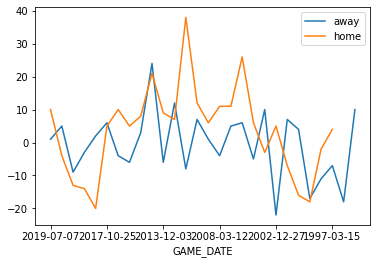

In [47]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()



<h1> HTTP and Requests</h1>

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

-   Understand HTTP    
-   Handle the HTTP Requests


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>
            <a href="#index">Overview of HTTP </a>
            <ul>
                <li><a href="#HTTP">Uniform Resource Locator:URL</a></li>
                 <li><a href="slice">Request</a></li>
                <li><a href="stride">Response</a></li>
            </ul>
        </li>
        <li>
            <a href="#RP">Requests in Python  </a>
            <ul>
                <li><a href="#get">Get Request with URL Parameters</a></li>
                <li><a href="#post">Post Requests </a></li>

</ul>
    
</div>

<hr>


When you, the **client**, use a web page your browser sends an **HTTP** request to the **server** where the page is hosted. The server tries to find the desired **resource** by default  "<code>index.html</code>". If your request is successful, the server will send the object to the client in an **HTTP response**; this includes information like the type of the **resource**, the length of the **resource**, and other information.   

<p>
The figure below represents the process; the circle on the left represents the client, the circle on the right represents the  Web server.  The table under the Web server represents a list of resources stored in the web server. In  this case an <code>HTML</code> file, <code>png</code> image, and <code>txt</code> file .
</p>
<p>
The <b>HTTP</b> protocol allows you to send and receive information through the web including webpages, images, and other web resources. In this lab, we will provide an overview of the Requests library for interacting with the <code>HTTP </code> protocol. 
</p


<div class="alert alert-block alert-info" style="margin-top: 20px">
         <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/images/reqest_basics.png" width="750" align="center">
   
</div>


Uniform resource locator (URL) is the most popular way to find resources on the web.  We can break the URL into three parts. 

<ul>
    <li><b>scheme</b> this is this protocol, for this lab it will always be <code>http://</code>  </li>
    <li><b> Internet address or  Base URL </b> this will be used to find the location here are some examples: <code>www.ibm.com</code> and  <code> www.gitlab.com </code> </li>
    <li><b>route</b> location on the web server for example: <code>/images/IDSNlogo.png</code> </li>
</ul>


You may also here the term uniform resource identifier (URI), URL are actually a subset of URIs. Another popular term is endpoint, this is the URL of an operation provided by a Web server.


<h2 id="RE">Request </h2>


The process can be broken into the <b>request</b> and <b>response </b> process.  The request using the get method is partially illustrated below. In the start line we have the <code>GET</code> method, this is an <code>HTTP</code> method. Also the location of the resource  <code>/index.html</code> and the <code>HTTP</code> version .The Request header passes additional information with an <code>HTTP</code> request:


<div class="alert alert-block alert-info" style="margin-top: 20px">
         <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/images/http_methods.png" width="400" align="center">
</div>


<h2 id="RES">Response</h2>


The figure below represents the response; the response start line contains the version number <code>HTTP/1.0</code>, a status code (200)  meaning success, followed by a descriptive phrase (OK). The response header contains useful information. Finally, we have the response body containing the requested file an <code> HTML </code> document.  It should be noted that some request have headers.


<div class="alert alert-block alert-info" style="margin-top: 20px">
         <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/images/response_message.png" width="400" align="center">
</div>


Some status code examples are shown in the table below, the prefix indicates the class; these are shown in yellow, with actual status codes shown in  white. Check out the following  <a href="https://developer.mozilla.org/en-US/docs/Web/HTTP/Status">link </a>  for more descriptions.


<div class="alert alert-block alert-info" style="margin-top: 20px">
         <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/images/status_code.png" width="300" align="center">
</div>


<h2 id="RP">Requests in Python</h2>


Requests is a python Library that allows you to send <code>HTTP/1.1</code> requests easily.  We can import the library as follows:


In [2]:
import requests

We will also use the following libraries 


In [3]:
import os 
from PIL import Image
from IPython.display import IFrame

 You can make a <code>GET</code> request via the method <code>get</code> to [www.ibm.com](http://www.ibm.com?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork-19487395&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork-19487395&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork-19487395&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork-19487395&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork-19487395&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork-19487395&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork-19487395&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork-19487395&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork-19487395&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork-19487395&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ): 


In [4]:
url='https://www.ibm.com/'
r=requests.get(url)


We have the response object <code>r</code> , this has information about the request, like the status of the request. We  can view the status code using the attribute <code>status_code </code>


In [5]:
r.status_code

200

You can view the request headers:


In [6]:
print(r.request.headers)

{'User-Agent': 'python-requests/2.24.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Cookie': '_abck=320F996ED728B905F5BF2F53F144BE3C~-1~YAAQTo9lX0dRHul1AQAAIE919QRworUzQt3uo3yqlH9tKvUBTs8XuYuxQLoyY1DNV/HdeCCulLh6ZVeJ8svoaNrgJ1cTPh4cGOfNkY6RrhPwugdPdPp4olsJCoLFOXPyN8k40Pvni1r6NB0jI/VE3M89Fafq6kumZSuH60LafcQCIkuSHaKCPvaJhgPupiFYcVc+gyzYRpKFSS8Yrdn/WYzTYhqOrg8K97jPewvrexXTGClAq53g9xoklKWIxHmQLLFPP9dugoD54ryrtWoCeIjy+ODNzvbTZ0w4RvcsUBwkFFkYfzqc~-1~-1~-1; bm_sz=302B02042BFA06ECB72F9D18D3193DFF~YAAQTo9lX0ZRHul1AQAAIE919Qm9TxXHMkrqqyVBvEYaupAiGhJ4LYOKFqfNg23b5XW8OiPkSZHU2DeoDJwndQIwSBLuzYCyKWAvs+sSaVcNzkDAfzL4IrW4CUlPewUECUOp7dmhkt5SjbyqmQRdU4I866J+Damq5lARFNuZ9kLlipTqQpLGrGcKP+wA'}


You can view the request body, in the following line, as there is no body for a get request we get a <code>None </code>:


In [7]:
print("request body:", r.request.body)

request body: None


 You can view the <code>HTTP</code> response header using the  attribute <code>headers</code>. This returns a python dictionary of <code>HTTP</code> response headers. 


In [8]:
header=r.headers
print(r.headers)

{'Server': 'Apache', 'x-drupal-dynamic-cache': 'UNCACHEABLE', 'Link': '<https://www.ibm.com/uk-en>; rel="canonical", <https://www.ibm.com/uk-en>; rel="revision", <https://www.ibm.com/uk-en>; rel="revision", <//1.cms.s81c.com>; rel=preconnect; crossorigin, <//1.cms.s81c.com>; rel=dns-prefetch', 'x-ua-compatible': 'IE=edge', 'Content-Language': 'en-uk', 'x-generator': 'Drupal 8 (https://www.drupal.org)', 'x-dns-prefetch-control': 'on', 'x-drupal-cache': 'MISS', 'Last-Modified': 'Mon, 23 Nov 2020 09:12:39 GMT', 'ETag': '"1606122759"', 'Content-Type': 'text/html; charset=UTF-8', 'x-acquia-host': 'www.ibm.com', 'x-acquia-path': '/uk-en', 'x-acquia-site': '', 'x-acquia-purge-tags': '', 'x-varnish': '34278206 35721610', 'x-cache-hits': '2', 'x-age': '1332', 'Accept-Ranges': 'bytes', 'Content-Encoding': 'gzip', 'Cache-Control': 'public, max-age=300', 'Expires': 'Mon, 23 Nov 2020 14:20:07 GMT', 'X-Akamai-Transformed': '9 12126 0 pmb=mTOE,1', 'Date': 'Mon, 23 Nov 2020 14:15:07 GMT', 'Content-Len

We can obtain the date the request was sent using the key <code>Data</code>


In [9]:
header['date']

'Mon, 23 Nov 2020 14:15:07 GMT'

<code>Content-Type</code> indicates the type of data:


In [10]:
header['Content-Type']

'text/html; charset=UTF-8'

You can also check the <code>encoding</code>:


In [11]:
 r.encoding

'UTF-8'

As the  <code>Content-Type</code> is <code>text/html</code> we can use the attribute <code>text</code> to display the <code>HTML</code> in the body. We can review the first 100 characters:


In [12]:
r.text[0:100]

'<!DOCTYPE html>\n<html lang="en-gb" dir="ltr">\n  <head>\n    <meta charset="utf-8" />\n<script>digitalD'

You can load other types of data for non-text requests like images, consider the URL of the following image:


In [13]:
# Use single quotation marks for defining string
url='https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png'

We can make a get request:


In [14]:
r=requests.get(url)

We can look at the response  header:


In [15]:
print(r.headers)

{'Date': 'Mon, 23 Nov 2020 14:15:12 GMT', 'Content-Type': 'image/png', 'Content-Length': '21590', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=d7f10a7a13a3d8dec0ccaef6f5e38a6651606140912; expires=Wed, 23-Dec-20 14:15:12 GMT; path=/; domain=.gitlab.com; HttpOnly; SameSite=Lax; Secure', 'Cache-Control': 'max-age=60, public', 'Content-Disposition': 'inline', 'Etag': 'W/"c26d88d0ca290ba368620273781ea37c"', 'X-Content-Type-Options': 'nosniff', 'X-Download-Options': 'noopen', 'X-Frame-Options': 'DENY', 'X-Gitlab-Feature-Category': 'source_code_management', 'X-Permitted-Cross-Domain-Policies': 'none', 'X-Request-Id': 'ngphzyFRw93', 'X-Runtime': '0.072272', 'X-Ua-Compatible': 'IE=edge', 'X-Xss-Protection': '1; mode=block', 'Strict-Transport-Security': 'max-age=31536000', 'Referrer-Policy': 'strict-origin-when-cross-origin', 'GitLab-LB': 'fe-01-lb-gprd', 'GitLab-SV': 'web-25-sv-gprd', 'CF-Cache-Status': 'EXPIRED', 'Accept-Ranges': 'bytes', 'cf-request-id': '06970e79fe00000621ac93e0000000

We can we can see the <code>'Content-Type'</code>


In [16]:
r.headers['Content-Type']

'image/png'

An image is a response object that contains the image as a  <a href="https://docs.python.org/3/glossary.html#term-bytes-like-object">bytes-like object</a>. As a result, we must save it using a file object. First, we specify the file path and
name 


In [17]:
path=os.path.join(os.getcwd(),'image.png')
path

'/home/wsuser/work/image.png'

We save the file, in order to access the body of the response we use the attribute <code>content</code> then save it using the <code>open</code> function and write <code>method</code>: 


In [18]:
with open(path,'wb') as f:
    f.write(r.content)

We can view the image:


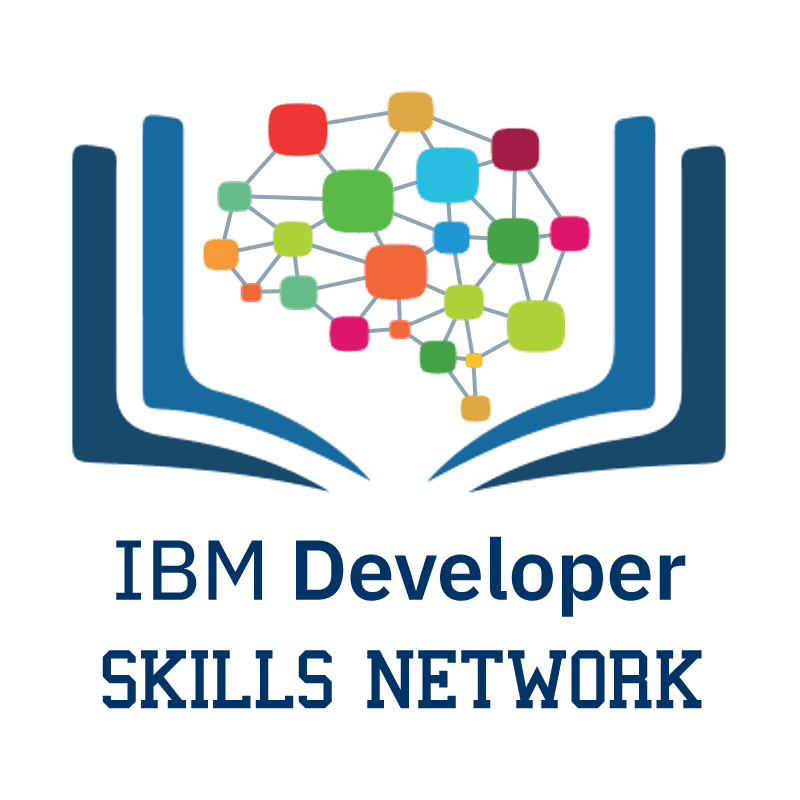

In [19]:
Image.open(path)  

In [20]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/labs/example1.txt'
path = os.path.join(os.getcwd(),'example1.txt')
r=requests.get(url)
with open(path,'wb') as f:
    f.write(r.content)
Image.open(path) 

UnidentifiedImageError: cannot identify image file '/home/wsuser/work/example1.txt'

In [21]:
url='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/labs/example1.txt'
path=os.path.join(os.getcwd(),'example1.txt')
r=requests.get(url)
with open(path,'wb') as f:
    f.write(r.content)

In [24]:
Image.open(path)

UnidentifiedImageError: cannot identify image file '/home/wsuser/work/example1.txt'

<h2 id="URL_P">Get Request with URL Parameters </h2>


You can use the <b>GET</b> method  to  modify the results of your query, for example retrieving data from an API .  We send a <b>GET</b> request to the  server. Like before we have the <b>Base URL</b>, in the <b>Route</b>  we append <code>/get</code> this indicates we would like to preform a <code>GET</code> request, this is demonstrated in the following table:


<div class="alert alert-block alert-info" style="margin-top: 20px">
         <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/images/base_URL_Route.png" width="400" align="center">
</div>


The Base URL is for <code>[http://httpbin.org/](http://httpbin.org?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork-19487395&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork-19487395&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork-19487395&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)</code> is a simple HTTP Request & Response Service. The <code>URL</code> in Python is given by:


In [25]:
url_get='http://httpbin.org/get'

A <a href="https://en.wikipedia.org/wiki/Query_string">query string</a> is a part of a uniform resource locator  (URL),  this sends other information to the web server. The start of the query is a <code>?</code>, followed by a series of parameter and value pairs, as shown in the table below.  The first parameter name is <code>name</code> and the value is <code>Joseph</code> the second parameter name is <code>ID</code>  and the Value is <code>123</code>. Each pair, parameter and value is separated by an equals sign, <code>=</code>.
The series of pairs is separated by the ampersand <code>&</code>.


<div class="alert alert-block alert-info" style="margin-top: 20px">
         <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/images/query_string.png" width="500" align="center">
</div>


To create a Query string, add a dictionary. The keys are the parameter names, and the values are the value of the Query string.


In [26]:
payload={"name":"Joseph","ID":"123"}

Then passing the dictionary <code>payload</code> to the <code>params</code> parameter of the <code> get()</code> function:


In [28]:
r=requests.get(url_get,params=payload)

In [29]:
r.url

'http://httpbin.org/get?name=Joseph&ID=123'

In [30]:
print("request body:", r.request.body)

request body: None


In [31]:
print(r.status_code)

200


In [32]:
#We can view the response as text:

print(r.text)

{
  "args": {
    "ID": "123", 
    "name": "Joseph"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.24.0", 
    "X-Amzn-Trace-Id": "Root=1-5fbbc5ff-2891b73f18b74e1b6c6b70da"
  }, 
  "origin": "158.175.142.99", 
  "url": "http://httpbin.org/get?name=Joseph&ID=123"
}



In [33]:
#We can look at the <code>'Content-Type'</code>.


r.headers['Content-Type']

'application/json'

As the content <code>'Content-Type'</code> is in the <code>JSAON</code> format we can use the method <code>json()</code> , it returns a Python  <code>dict</code>:


In [34]:
r.json()

{'args': {'ID': '123', 'name': 'Joseph'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.24.0',
  'X-Amzn-Trace-Id': 'Root=1-5fbbc5ff-2891b73f18b74e1b6c6b70da'},
 'origin': '158.175.142.99',
 'url': 'http://httpbin.org/get?name=Joseph&ID=123'}

The  key <code>args</code> had the name and values:


In [35]:
r.json()['args']

{'ID': '123', 'name': 'Joseph'}

<h2 id="POST">Post Requests  </h2>


Like a <code>GET</code> request a <code>POST</code> is used to send data to a server, but the <code>POST</code> request sends the data in a request body. In order to send the Post Request in Python in the <code>URL</code> we change the route to <code>POST</code>:


In [37]:
url_post='http://httpbin.org/post'

This endpont will expect data as a file or as a form, a from is convenient way to configure an HTTP request to send data to a server.


To make a <code>POST</code> request we use the <code>post()</code> function, the variable <code>payload</code>  is passed to the parameter <code> data </code>:


In [38]:
r_post=requests.post(url_post,data=payload)

Comparing the URL from the response object of the <code>GET</code> and <code>POST</code> request we see the <code>POST</code> request has no name or value pairs.


In [40]:
print("POST request URL:",r_post.url )
print("GET request URL:",r.url)

POST request URL: http://httpbin.org/post
GET request URL: http://httpbin.org/get?name=Joseph&ID=123


We can compare the <code>POST</code> and <code>GET</code> request body, we see only the <code>POST</code> request has a body:


In [41]:
print("POST request body:",r_post.request.body)
print("GET request body:",r.request.body)

POST request body: name=Joseph&ID=123
GET request body: None


In [42]:
r_post.json()['form']

{'ID': '123', 'name': 'Joseph'}